In [2]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
print(os.listdir("/Users/ravinitchand/Desktop/DSProject/chest_xray"))

['PythonCode', '.DS_Store', 'test', 'train', 'val']


In [5]:
#show different folders
mainDIR = os.listdir('/Users/ravinitchand/Desktop/DSProject/chest_xray')
print(mainDIR)
train_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/train/'
val_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/val/'
test_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/test/'

['PythonCode', '.DS_Store', 'test', 'train', 'val']


In [6]:
## Identifying the NORMAL AND PNEUMONIA sets in the train folder
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [10]:
## Finding a random picture from the normal folder
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

1342
normal picture title:  NORMAL2-IM-1351-0001.jpeg


In [11]:
## Finding a random picture from the Pneumonia Folder
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

pneumonia picture title: person968_virus_1642.jpeg


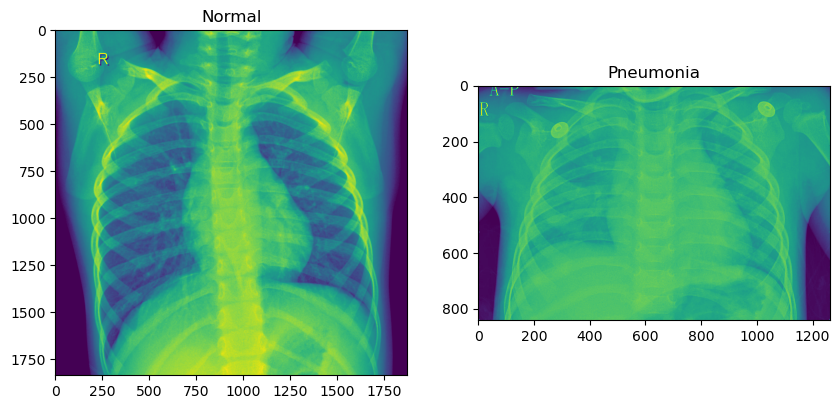

In [12]:
## Loading the random images into Python and plotting them
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

plt.show()

In [13]:
## Creating the convolutional neural net model
cnn = Sequential()

## Adding a convolutional layer to the model
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

## Adding a pooling layer to the model
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## Adding another convolutional layer to the model
cnn.add(Conv2D(32, (3, 3), activation="relu"))

## Adding another pooling layer to the model
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## "Flatten" the output into one dimension
cnn.add(Flatten())

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
## Add dense layers for the non-linear relationships and sigmoid for binary classification
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

## Compile the neural network using the "Adam" optimizer
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Set the number of samples as well as the batch size
num_of_test_samples = 600
batch_size = 32

## Data generation for the training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255) ## Scales the image to the appropriate dimensions

training_set = train_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

## Same as above on the test and validation data sets
validation_generator = test_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
## Summary of the CNN and model fitting
cnn.summary()

cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)
                         

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 502ms/step - accuracy: 0.7704 - loss: 0.4787 - val_accuracy: 0.6250 - val_loss: 0.6358


2024-05-13 23:31:18.887814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [17]:
## Model Accuracy metrics
test_accu = cnn.evaluate(test_set,steps=624)
print(f'The testing accuracy is: {test_accu[1] * 100:.2f}%')

## Predictions
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

confusion_matrix(validation_generator.classes, y_pred)
array([0, 0, 0, ..., 0, 0, 0])
max(y_pred)


plt.bar(cnn_model.history['val_loss'], cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()


## Tuning Model


## Try a second model as well
# Experiment with different base models/layers also
# Do experimenting with customized layers to the model
# Tune the hyperparameters

624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7826 - loss: 0.4603   
The testing accuracy is: 78.21%


2024-05-13 23:31:57.474982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step


ValueError: Found input variables with inconsistent numbers of samples: [16, 624]

624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step    
[[234   0]
 [390   0]]


2024-05-13 23:07:45.569357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


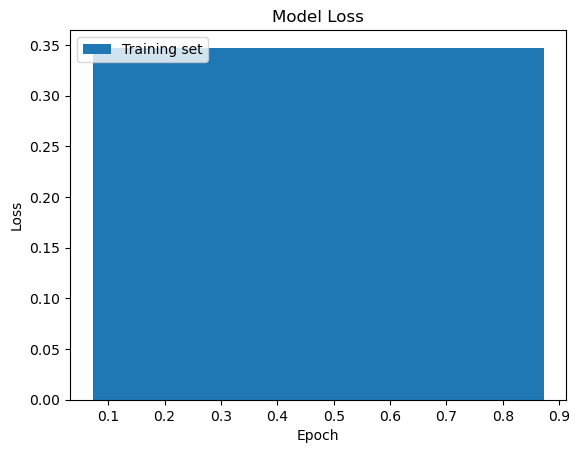

In [26]:
## Model Accuracy metrics
#test_accu = cnn.evaluate(test_set,steps=624)
#print(f'The testing accuracy is: {test_accu[1] * 100:.2f}%')

## Predictions

# Predictions
Y_pred = cnn.predict (test_set, steps=624)
y_pred = np.argmax(Y_pred, axis=1)

# Compute confusion matrix using the true labels from the test set
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)

# Plotting the model loss
plt.bar(cnn_model.history['val_loss'], cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix,accuracy_score
import tensorflow as tf

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# preprocessing function
def preprocess_data(img_dim, batch_size):
    train_image_gen = ImageDataGenerator(rescale=1./255, zoom_range=.3, vertical_flip=True)
    test_image_gen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_image_gen.flow_from_directory(
        directory="/Users/judynei/ECS111/chest_xray/train",
        target_size=(img_dim, img_dim),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )
    
    test_generator = test_image_gen.flow_from_directory(
        directory="/Users/judynei/ECS111/chest_xray/test",
        target_size=(img_dim, img_dim),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )
    
    val_generator = test_image_gen.flow_from_directory(
        directory="/Users/judynei/ECS111/chest_xray/val",
        target_size=(img_dim, img_dim),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )
    
    test_Data = []
    test_Labels = []
    train_Data = []
    train_Labels = []
    val_Data = []
    val_Labels = []

    def load_images_and_labels(dataset_path, img_dim):
        images = []
        labels = []
        
        for condition in ['NORMAL', 'PNEUMONIA']:
            dir_path = os.path.join(dataset_path, condition)
            label = 0 if condition == 'NORMAL' else 1
            for img_name in os.listdir(dir_path):
                img_path = os.path.join(dir_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_dim, img_dim))
                    img = img.astype('float32') / 255
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Error: Unable to read image file: {img_path}")
        
        return np.array(images), np.array(labels)
    
    train_data, train_labels = load_images_and_labels("/Users/judynei/ECS111/chest_xray/train", img_dim)
    test_data, test_labels = load_images_and_labels("/Users/judynei/ECS111/chest_xray/test", img_dim)
    val_data, val_labels = load_images_and_labels("/Users/judynei/ECS111/chest_xray/val", img_dim)

    test_Data = np.array(test_data)
    test_Labels = np.array(test_labels)
    train_Data = np.array(train_data)
    train_Labels = np.array(train_labels)
    val_Data = np.array(val_data)
    val_Labels = np.array(val_labels)
    
    return train_generator, test_generator, val_generator, test_Data, test_Labels, train_Data, train_Labels, val_Data, val_labels

In [ ]:
# Define input shape
image_dim = (150, 150, 3)

train_generator, test_generator, val_generator, test_Data, test_Labels, train_Data, train_Labels, val_Data, val_labels = preprocess_data(150, 8)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=image_dim),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10
verbose = 1
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    verbose=verbose,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the model
model.save("pneumonia_detection_model.h5")
print("Model saved successfully.")

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:" + str(test_loss))
print("Test Accuracy:" + str(test_accuracy))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = test_Labels
pred = model.predict(test_Data)

predicted_labels = np.round(pred)

class_names = ['Normal', 'Pneumonia']

# confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Classification report
print("Classification Report : ")
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

In [ ]:
# Training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Get an example of each class
# Define directories
train_path = "/Users/judynei/ECS111/chest_xray/train"
validation_path = "/Users/judynei/ECS111/chest_xray/val"
test_path = "/Users/judynei/ECS111/chest_xray/test"

image_categories = os.listdir(train_path)
print(image_categories)

from PIL import Image

plt.figure(figsize=(10, 10))

for i, category in enumerate(image_categories):
    category_path = os.path.join(train_path, category)
    image_name = os.listdir(category_path)[0]
    image_path = os.path.join(category_path, image_name)
    
    img = Image.open(image_path)  # Load image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')
    
    if i == 5:  # Adjust this based on how many images you want to show
        break

plt.tight_layout()
plt.show()

In [ ]:
# Find misclassified examples
misclassified_indices = np.where(predicted_labels != test_Labels)[0]

# Initialize dictionaries to store misclassified examples for each class
misclassified_examples = {0: None, 1: None}

for i in misclassified_indices:
    true_label = test_Labels[i]
    predicted_label = predicted_labels[i]
    if true_label != predicted_label:
        if misclassified_examples[true_label] is None:
            misclassified_examples[true_label] = test_Data[i]
        elif misclassified_examples[predicted_label] is None:
            misclassified_examples[predicted_label] = test_Data[i]

# Plot misclassified examples for each class
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(misclassified_examples[i])  # Plot the misclassified example for class i
    plt.title(f"True label: {class_names[i]}, Predicted label: {class_names[1-i]}")
    plt.axis('off')
plt.show()

In [ ]:
def get_class_name(label):
    return "Pneumonia" if label == 1 else "Normal"

indices_by_class = {0: [], 1: []}

for idx, label in enumerate(test_Labels):
    indices_by_class[label].append(idx)

# Plot ten random photos for each class labels
plt.figure(figsize=(15, 6))
for i in range(2):
    class_indices = np.random.choice(indices_by_class[i], size=10, replace=False)
    for j, idx in enumerate(class_indices):
        plt.subplot(2, 10, i*10 + j + 1)
        plt.imshow(test_Data[idx])
        plt.title(f"True: {get_class_name(test_Labels[idx])}\nPredicted: {get_class_name(predicted_labels[idx])}", fontsize = 8)
        plt.axis('off')
plt.tight_layout()
plt.show()